# ECS784U/P DATA ANALYTICS
## Abigail Frimpong
### Coursework 1

* IMPORT GLOBAL libraries 

In [798]:
conda config --set auto_activate_base false


Note: you may need to restart the kernel to use updated packages.


In [799]:
# The necessary imports first
import os
os.environ["OMP_NUM_THREADS"] = '1'# Stops warnings about memory leaks from kmeans seen on some platforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import MatplotlibDeprecationWarning
%matplotlib inline
np.set_printoptions(precision=3, suppress=True, formatter={'float': lambda x:f'{x:7.3f}'}, linewidth=100)

In [800]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [801]:
import os, sys, re, pickle, glob
import urllib.request
import zipfile

In [802]:
import IPython.display as ipd
from tqdm import tqdm

In [803]:
import pandas as pd
import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
from sklearn import datasets

In [804]:
!pip install librosa

zsh:1: command not found: pip


In [805]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [806]:
conda install -c conda-forge librosa

Retrieving noticdone
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: | 

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [807]:
print(os.listdir("/Users/afrimpong/Downloads/Documents"))

['Modified_dataset.csv', 'time-of-day-per-month.csv', '.DS_Store', 'datapackage.json', '.localized', 'london-air-quality.py', 'monthly-averages.csv', 'air-quality-london.xlsx', 'Coursework 1.ipynb', '.ipynb_checkpoints']


In [808]:
print("Current Directory:", os.getcwd())

Current Directory: /Users/afrimpong/Downloads/Documents


In [809]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [810]:
from IPython.display import Image
Image(url = "https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg")

## Reading the original dataset 

In [812]:
Monthly_df = pd.read_csv("./monthly-averages.csv").set_index('Month')

In [956]:
Monthly_df

London Mean Roadside Nitric Oxide (ug/m3)  \
Month                                                   
2008-01-01                                        NaN   
2008-02-01                                        NaN   
2008-03-01                                        NaN   
2008-04-01                                        NaN   
2008-05-01                                        NaN   
...                                               ...   
2018-08-01                                  33.125000   
2018-09-01                                  39.063333   
2018-10-01                                  48.643414   
2018-11-01                                  52.535833   
2018-12-01                                  51.264113   

            London Mean Roadside Nitrogen Dioxide (ug/m3)  \
Month                                                       
2008-01-01                                      55.502688   
2008-02-01                                      75.922414   
2008-03-01                                      55.610215   
2008-04-01                                      61.756944   
2008-05-01                                      62.903226   
...                                                   ...   
2018-08-01                                      38.950403   
2018-09-01                                      43.906389   
2018-10-01                                      46.765457   
2018-11-01                                      47.584028   
2018-12-01                                      47.755780   

            London Mean Roadside Oxides of Nitrogen (ug/m3)  \
Month                                                         
2008-01-01                                              NaN   
2008-02-01                                              NaN   
2008-03-01                                              NaN   
2008-04-01                                              NaN   
2008-05-01                                              NaN   
...                                                     ...   
2018-08-01                                        89.741935   
2018-09-01                                       103.810556   
2018-10-01                                       121.360887   
2018-11-01                                       128.134306   
2018-12-01                                       126.343548   

            London Mean Roadside Ozone (ug/m3)  \
Month                                            
2008-01-01                           29.512097   
2008-02-01                           20.317529   
2008-03-01                           40.103495   
2008-04-01                           37.884722   
2008-05-01                           46.266129   
...                                        ...   
2018-08-01                           22.498118   
2018-09-01                           26.625556   
2018-10-01                           19.501075   
2018-11-01                           17.159583   
2018-12-01                           22.682258   

            London Mean Roadside PM10 Particulate (ug/m3)  \
Month                                                       
2008-01-01                                      24.969086   
2008-02-01                                      39.477011   
2008-03-01                                      21.569892   
2008-04-01                                      28.740278   
2008-05-01                                      34.611559   
...                                                   ...   
2018-08-01                                      16.284946   
2018-09-01                                      18.896111   
2018-10-01                                      19.339247   
2018-11-01                                      23.600000   
2018-12-01                                      20.296371   

            London Mean Roadside PM2.5 Particulate (ug/m3)  \
Month                                                        
2008-01-01                                       14.678763   
2008-02-01               

In [919]:
#obtain information on data
print(Monthly_df.dtypes)
Monthly_df.info()
print(Monthly_df.shape)
Monthly_df.describe()

London Mean Roadside Nitric Oxide (ug/m3)            float64
London Mean Roadside Nitrogen Dioxide (ug/m3)        float64
London Mean Roadside Oxides of Nitrogen (ug/m3)      float64
London Mean Roadside Ozone (ug/m3)                   float64
London Mean Roadside PM10 Particulate (ug/m3)        float64
London Mean Roadside PM2.5 Particulate (ug/m3)       float64
London Mean Roadside Sulphur Dioxide (ug/m3)         float64
London Mean Background Nitric Oxide (ug/m3)          float64
London Mean Background Nitrogen Dioxide (ug/m3)      float64
London Mean Background Oxides of Nitrogen (ug/m3)    float64
London Mean Background Ozone (ug/m3)                 float64
London Mean Background PM10 Particulate (ug/m3)      float64
London Mean Background PM2.5 Particulate (ug/m3)     float64
London Mean Background Sulphur Dioxide (ug/m3)       float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 2008-01-01 to 2018-12-01
Data columns (total 14 columns):
 #   Column     

London Mean Roadside Nitric Oxide (ug/m3)  \
count                                 108.000000   
mean                                   78.339254   
std                                    28.466425   
min                                    27.211156   
25%                                    60.433804   
50%                                    72.407863   
75%                                    99.704847   
max                                   180.933333   

       London Mean Roadside Nitrogen Dioxide (ug/m3)  \
count                                     132.000000   
mean                                       55.757291   
std                                         7.902649   
min                                        38.950403   
25%                                        49.122043   
50%                                        55.706519   
75%                                        61.770027   
max                                        75.922414   

       London Mean Roadside Oxides of Nitrogen (ug/m3)  \
count                                       108.000000   
mean                                        139.490022   
std                                          31.601333   
min                                          82.235139   
25%                                         117.582400   
50%                                         131.843578   
75%                                         163.112344   
max                                         250.743414   

       London Mean Roadside Ozone (ug/m3)  \
count                          132.000000   
mean                            27.173816   
std                              8.396838   
min                             10.658199   
25%                             21.084761   
50%                             26.372782   
75%                             33.915764   
max                             46.266129   

       London Mean Roadside PM10 Particulate (ug/m3)  \
count                                     132.000000   
mean                                       25.122292   
std                                         5.191290   
min                                        16.284946   
25%                                        21.664651   
50%                                        23.986160   
75%                                        27.821734   
max                                        43.314919   

       London Mean Roadside PM2.5 Particulate (ug/m3)  \
count                                      132.000000   
mean                                        15.715170   
std                                          4.891652   
min                                          7.897849   
25%                                         12.520632   
50%                                         14.333468   
75%                                         18.111300   
max                                         32.580780   

       London Mean Roadside Sulphur Dioxide (ug/m3)  \
count                                    132.000000   
mean                                       3.262744   
std                                        1.494524   
min                                       -1.686945   
25%                                        2.404772   
50%                                        3.232594   
75%                                        4.033429   
max                                        8.540566   

       London Mean Background Nitric Oxide (ug/m3)  \
count                                   108.000000   
mean                                     22.122995   
std                                      14.311697   
min                                       4.172043   
25%                                      12.002621   
50%                                      17.329740   
75%                                      30.134337   
max                                      79.245296   

       London Mean Background Nitrogen Dioxide (ug/m3)  \
count                                       

## Relacing missing values

In [816]:
#Finding missing values
print(Monthly_df.isnull().sum())
print(Monthly_df.isnull().sum().sum())  # Total count of NaN values per column 

London Mean Roadside Nitric Oxide (ug/m3)            24
London Mean Roadside Nitrogen Dioxide (ug/m3)         0
London Mean Roadside Oxides of Nitrogen (ug/m3)      24
London Mean Roadside Ozone (ug/m3)                    0
London Mean Roadside PM10 Particulate (ug/m3)         0
London Mean Roadside PM2.5 Particulate (ug/m3)        0
London Mean Roadside Sulphur Dioxide (ug/m3)          0
London Mean Background Nitric Oxide (ug/m3)          24
London Mean Background Nitrogen Dioxide (ug/m3)       0
London Mean Background Oxides of Nitrogen (ug/m3)    24
London Mean Background Ozone (ug/m3)                  0
London Mean Background PM10 Particulate (ug/m3)       0
London Mean Background PM2.5 Particulate (ug/m3)      4
London Mean Background Sulphur Dioxide (ug/m3)        0
dtype: int64
100


**100 missing values from Dataset**

In [818]:
#fill missing data with Mean 
Monthlydf_filled = Monthly_df.fillna(Monthly_df.mean())
Monthlydf_filled

London Mean Roadside Nitric Oxide (ug/m3)  \
Month                                                   
2008-01-01                                  78.339254   
2008-02-01                                  78.339254   
2008-03-01                                  78.339254   
2008-04-01                                  78.339254   
2008-05-01                                  78.339254   
...                                               ...   
2018-08-01                                  33.125000   
2018-09-01                                  39.063333   
2018-10-01                                  48.643414   
2018-11-01                                  52.535833   
2018-12-01                                  51.264113   

            London Mean Roadside Nitrogen Dioxide (ug/m3)  \
Month                                                       
2008-01-01                                      55.502688   
2008-02-01                                      75.922414   
2008-03-01                                      55.610215   
2008-04-01                                      61.756944   
2008-05-01                                      62.903226   
...                                                   ...   
2018-08-01                                      38.950403   
2018-09-01                                      43.906389   
2018-10-01                                      46.765457   
2018-11-01                                      47.584028   
2018-12-01                                      47.755780   

            London Mean Roadside Oxides of Nitrogen (ug/m3)  \
Month                                                         
2008-01-01                                       139.490022   
2008-02-01                                       139.490022   
2008-03-01                                       139.490022   
2008-04-01                                       139.490022   
2008-05-01                                       139.490022   
...                                                     ...   
2018-08-01                                        89.741935   
2018-09-01                                       103.810556   
2018-10-01                                       121.360887   
2018-11-01                                       128.134306   
2018-12-01                                       126.343548   

            London Mean Roadside Ozone (ug/m3)  \
Month                                            
2008-01-01                           29.512097   
2008-02-01                           20.317529   
2008-03-01                           40.103495   
2008-04-01                           37.884722   
2008-05-01                           46.266129   
...                                        ...   
2018-08-01                           22.498118   
2018-09-01                           26.625556   
2018-10-01                           19.501075   
2018-11-01                           17.159583   
2018-12-01                           22.682258   

            London Mean Roadside PM10 Particulate (ug/m3)  \
Month                                                       
2008-01-01                                      24.969086   
2008-02-01                                      39.477011   
2008-03-01                                      21.569892   
2008-04-01                                      28.740278   
2008-05-01                                      34.611559   
...                                                   ...   
2018-08-01                                      16.284946   
2018-09-01                                      18.896111   
2018-10-01                                      19.339247   
2018-11-01                                      23.600000   
2018-12-01                                      20.296371   

            London Mean Roadside PM2.5 Particulate (ug/m3)  \
Month                                                        
2008-01-01                                       14.678763   
2008-02-01               

In [819]:
# Double check if there are still missing values:
print(Monthlydf_filled.isnull().sum())
print(Monthlydf_filled.isnull().sum().sum())  # Total count of NaN values

London Mean Roadside Nitric Oxide (ug/m3)            0
London Mean Roadside Nitrogen Dioxide (ug/m3)        0
London Mean Roadside Oxides of Nitrogen (ug/m3)      0
London Mean Roadside Ozone (ug/m3)                   0
London Mean Roadside PM10 Particulate (ug/m3)        0
London Mean Roadside PM2.5 Particulate (ug/m3)       0
London Mean Roadside Sulphur Dioxide (ug/m3)         0
London Mean Background Nitric Oxide (ug/m3)          0
London Mean Background Nitrogen Dioxide (ug/m3)      0
London Mean Background Oxides of Nitrogen (ug/m3)    0
London Mean Background Ozone (ug/m3)                 0
London Mean Background PM10 Particulate (ug/m3)      0
London Mean Background PM2.5 Particulate (ug/m3)     0
London Mean Background Sulphur Dioxide (ug/m3)       0
dtype: int64
0


## Removing duplicates if any

In [821]:
print("Total duplicate rows:", Monthlydf_filled.duplicated().sum())


Total duplicate rows: 0


In [822]:
#I'm double-checking that there aren't any duplicates
Monthlydf_filled.duplicated()
Modified_dataset[Modified_dataset.duplicated()]

Empty DataFrame
Columns: [London Mean Nitric Oxide (ug/m3), London Mean Nitrogen Dioxide (ug/m3), London Mean Oxides of Nitrogen (ug/m3), London Mean Ozone (ug/m3), London Mean PM10 Particulate (ug/m3), London Mean PM2.5 Particulate (ug/m3), London Mean Sulphur Dioxide (ug/m3)]
Index: []

**No duplicate rows**

## Feauture selection

In [825]:
Monthlydf_filled 
Mean_Column1 = ["London Mean Roadside Nitric Oxide (ug/m3)","London Mean Background Nitric Oxide (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean Nitric Oxide (ug/m3)"] = Monthlydf_filled[Mean_Column1].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column1, inplace=True)  #drop the original columns

Mean_Column2 = ["London Mean Roadside Nitrogen Dioxide (ug/m3)","London Mean Background Nitrogen Dioxide (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean Nitrogen Dioxide (ug/m3)"] = Monthlydf_filled[Mean_Column2].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column2, inplace=True)  #drop the original columns

Mean_Column3 = ["London Mean Roadside Oxides of Nitrogen (ug/m3)","London Mean Background Oxides of Nitrogen (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean Oxides of Nitrogen (ug/m3)"] = Monthlydf_filled[Mean_Column3].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column3, inplace=True)  #drop the original columns

Mean_Column4 = ["London Mean Roadside Ozone (ug/m3)","London Mean Background Ozone (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean Ozone (ug/m3)"] = Monthlydf_filled[Mean_Column4].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column4, inplace=True)  #drop the original columns

Mean_Column5 = ["London Mean Roadside PM10 Particulate (ug/m3)","London Mean Background PM10 Particulate (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean PM10 Particulate (ug/m3)"] = Monthlydf_filled[Mean_Column5].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column5, inplace=True)  #drop the original columns

Mean_Column6 = ["London Mean Roadside PM2.5 Particulate (ug/m3)","London Mean Background PM2.5 Particulate (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean PM2.5 Particulate (ug/m3)"] = Monthlydf_filled[Mean_Column6].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column6, inplace=True)  #drop the original columns

Mean_Column7 = ["London Mean Roadside Sulphur Dioxide (ug/m3)","London Mean Background Sulphur Dioxide (ug/m3)"]  #I'm doing the average of the column based on their pollutant
Monthlydf_filled["London Mean Sulphur Dioxide (ug/m3)"] = Monthlydf_filled[Mean_Column7].mean(axis=1) #create a new colum with the average
Monthlydf_filled.drop(columns=Mean_Column7, inplace=True)  #drop the original columns

#Save the new datast
Monthlydf_filled.to_csv("Modified_dataset.csv", index=False)



In [826]:
# The Dataset after feature selection
Modified_dataset = pd.read_csv("./Modified_dataset.csv")
Modified_dataset

London Mean Nitric Oxide (ug/m3)  London Mean Nitrogen Dioxide (ug/m3)  \
0                           50.231125                             48.920699   
1                           50.231125                             68.079741   
2                           50.231125                             47.705645   
3                           50.231125                             52.883333   
4                           50.231125                             53.522177   
..                                ...                                   ...   
127                         19.509476                             29.737433   
128                         24.645903                             34.921111   
129                         31.133065                             38.290793   
130                         35.410833                             40.728333   
131                         35.199866                             40.263642   

     London Mean Oxides of Nitrogen (ug/m3)  London Mean Ozone (ug/m3)  \
0                                 97.936703                  33.227151   
1                                 97.936703                  23.371408   
2                                 97.936703                  45.165323   
3                                 97.936703                  44.009028   
4                                 97.936703                  53.389113   
..                                      ...                        ...   
127                               58.652554                  29.902823   
128                               71.683333                  33.790347   
129                               85.020833                  24.892809   
130                               92.977431                  20.710972   
131                               93.717809                  26.452016   

     London Mean PM10 Particulate (ug/m3)  \
0                               21.893145   
1                               35.686782   
2                               18.523522   
3                               25.234722   
4                               32.078629   
..                                    ...   
127                             14.105914   
128                             16.577431   
129                             17.066532   
130                             21.512639   
131                             17.928763   

     London Mean PM2.5 Particulate (ug/m3)  \
0                                13.985745   
1                                21.032857   
2                                12.796430   
3                                16.876918   
4                                22.042445   
..                                     ...   
127                               7.146237   
128                               8.816597   
129                              10.239315   
130                              14.366667   
131                              10.746237   

     London Mean Sulphur Dioxide (ug/m3)  
0                               3.895161  
1                               7.143678  
2                               3.077285  
3                               3.855556  
4                               4.442204  
..                                   ...  
127                             1.859946  
128                             0.750208  
129                             1.024802  
130                             4.139184  
131                             2.151116  

[132 rows x 7 columns]

In [827]:
# Average air pollutant levels in London
column_means = Modified_dataset.mean()
print(column_means)

London Mean Nitric Oxide (ug/m3)          50.231125
London Mean Nitrogen Dioxide (ug/m3)      45.311040
London Mean Oxides of Nitrogen (ug/m3)    97.936703
London Mean Ozone (ug/m3)                 32.034174
London Mean PM10 Particulate (ug/m3)      22.197385
London Mean PM2.5 Particulate (ug/m3)     14.503948
London Mean Sulphur Dioxide (ug/m3)        3.312569
dtype: float64


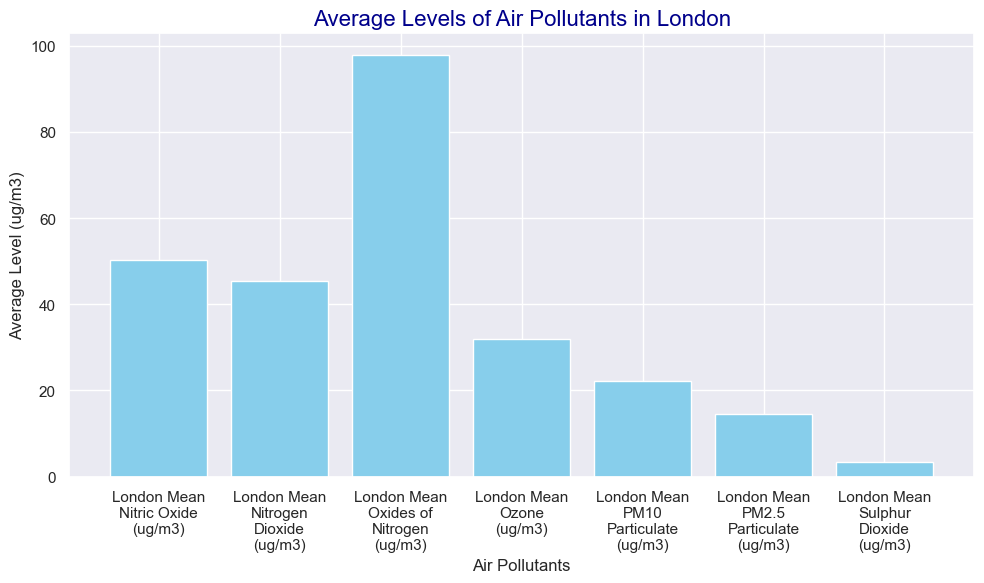

In [828]:
# Plotting the histogram
import textwrap
plt.figure(figsize=(10,6))
plt.bar(column_means.index, column_means.values, color='skyblue')
plt.xlabel('Air Pollutants')
plt.ylabel('Average Level (ug/m3)')
plt.title('Average Levels of Air Pollutants in London', fontsize=16, color='darkblue')
wrapped_labels = [textwrap.fill(label, width=12) for label in column_means.index]
plt.xticks(ticks=range(len(column_means.index)), labels=wrapped_labels, rotation=0) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlap

# Show the plot
plt.show()

## Normality testing

In [830]:
Modified_dataset.shape # checking the size of my dataset

(132, 7)

In [831]:
Modified_dataset.describe() #obtain the summary statistics of each air pollutant

London Mean Nitric Oxide (ug/m3)  London Mean Nitrogen Dioxide (ug/m3)  \
count                        132.000000                            132.000000   
mean                          50.231125                             45.311040   
std                           18.916898                              7.989775   
min                           15.691599                             29.727778   
25%                           37.240591                             38.714315   
50%                           50.231125                             44.682743   
75%                           59.983261                             51.143266   
max                          130.089315                             68.079741   

       London Mean Oxides of Nitrogen (ug/m3)  London Mean Ozone (ug/m3)  \
count                              132.000000                 132.000000   
mean                                97.936703                  32.034174   
std                                 23.751687                   9.816252   
min                                 53.938611                  12.263844   
25%                                 80.401778                  25.161576   
50%                                 97.936703                  30.770901   
75%                                108.230544                  40.033144   
max                                189.779032                  53.389113   

       London Mean PM10 Particulate (ug/m3)  \
count                            132.000000   
mean                              22.197385   
std                                4.898204   
min                               14.105914   
25%                               18.915176   
50%                               21.006284   
75%                               24.409880   
max                               40.123790   

       London Mean PM2.5 Particulate (ug/m3)  \
count                             132.000000   
mean                               14.503948   
std                                 4.586581   
min                                 7.146237   
25%                                11.115608   
50%                                13.051277   
75%                                16.696020   
max                                31.246573   

       London Mean Sulphur Dioxide (ug/m3)  
count                           132.000000  
mean                              3.312569  
std                               1.025395  
min                               0.374874  
25%                               2.626546  
50%                               3.163375  
75%                               3.928726  
max                               7.143678

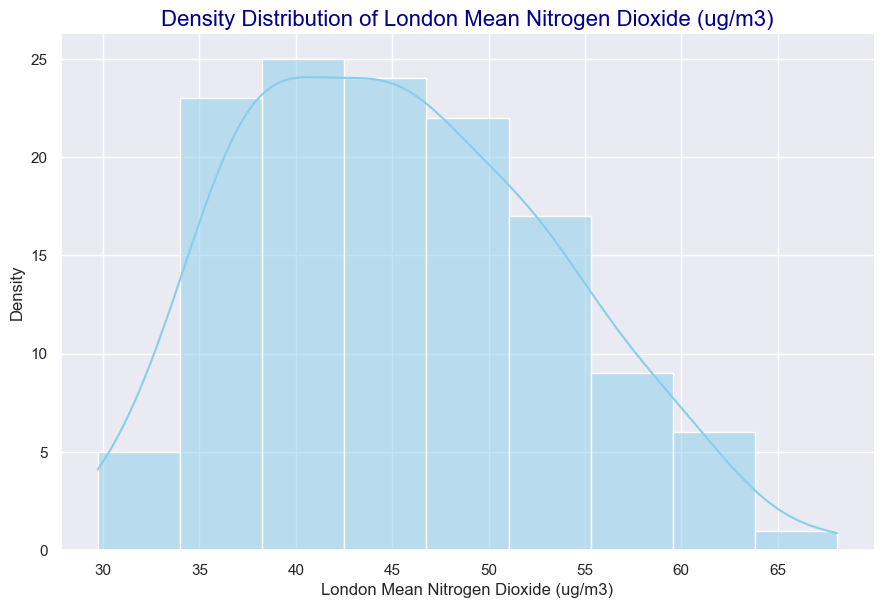

In [832]:
pollutant = "London Mean Nitrogen Dioxide (ug/m3)"
# Plotting the density distribution using seaborn's displot
sns.displot(Modified_dataset[pollutant], kde=True, color='skyblue', height=6, aspect=1.5)
# Customize the labels and title
plt.xlabel(f'{pollutant}')
plt.ylabel('Density')
plt.title(f'Density Distribution of {pollutant}',fontsize=16, color='darkblue')

# Show the plot
plt.show()

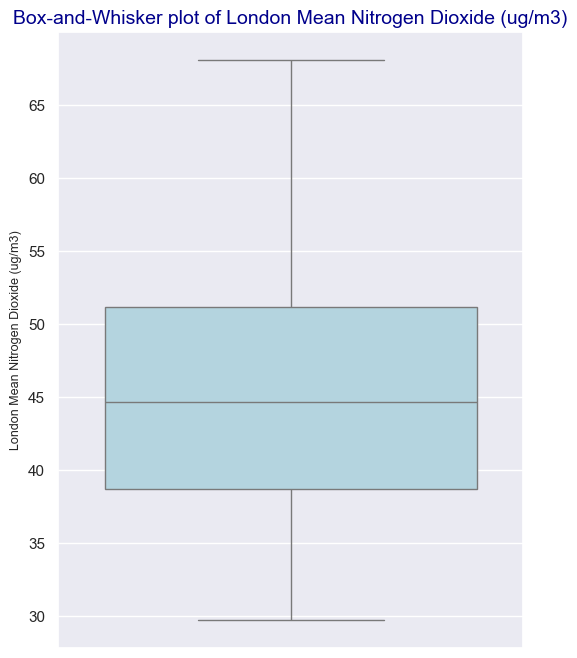

In [833]:
pollutant = "London Mean Nitrogen Dioxide (ug/m3)"
plt.figure(figsize=(6,8))
sns.boxplot(y=Modified_dataset[pollutant], color="lightblue")
plt.ylabel(f'{pollutant}', fontsize=9)
plt.title(f'Box-and-Whisker plot of {pollutant}', fontsize=14, color='darkblue')
plt.show()

* There are no circle labels from the boxplot, meaning there are no outliers; this means there arent values that differ from the mean over 3times more than the standard deviation for the data of London Mean Nitrogen Dioxide. The middle line (median) in the box is also quite centered. This, plus the density distribution histogram with the bell-shaped curve, suggest that the data has a normal distribution with positive skewness. 

In [835]:
import scipy.stats as stats
pollutant="London Mean Nitrogen Dioxide (ug/m3)"
data = Modified_dataset[pollutant]
# Generate Q-Q plot
fig, ax = plt.subplots(figsize=(7, 5))
stats.probplot(data, dist="norm", plot=ax)

# Customize plot appearance
ax.get_lines()[1].set_color('red')  # Make the diagonal line red
ax.get_lines()[1].set_linestyle('--')  # Dashed line for reference
ax.set_title(f'Normal Q-Q Plot of {pollutant}', fontsize=14, color='darkblue')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

* As seen, the points closely following the red dashed line indicate that the pollutant data is normally distributed; the S-shaped curve indicate the positive skewness present (as seen in the histogram); the few data points at the ends indicate the high and low outlier values caused by adversed weather conditions. 

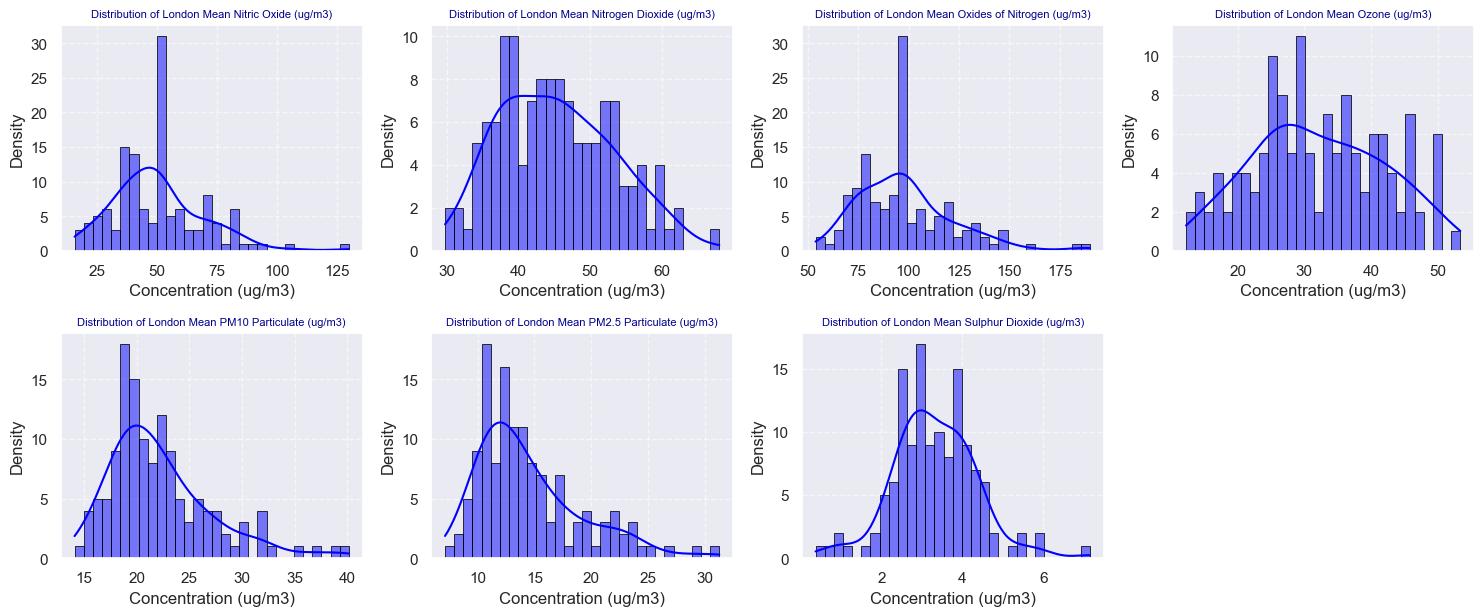

In [837]:
plt.figure(figsize=(15, 12))

# Loop through each column and plot the histogram with density
for i, column in enumerate(Modified_dataset.columns, 1):
    plt.subplot(4, 4, i)  # Creating a grid layout (4 rows, 4 columns)
    sns.histplot(Monthlydf_filled[column].dropna(), kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=8, color='darkblue')
    plt.xlabel('Concentration (ug/m3)')
    plt.ylabel('Density')
    plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

* Normal distribution with positive skewness for all air pollutants.

# Methodology 

## Decision tree

In [841]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Select dependent variable (y) and independent variables (X)
y = Modified_dataset["London Mean Nitrogen Dioxide (ug/m3)"]
X = Modified_dataset[["London Mean Nitric Oxide (ug/m3)", 
                      "London Mean Oxides of Nitrogen (ug/m3)", 
                      "London Mean Ozone (ug/m3)",
                      "London Mean PM10 Particulate (ug/m3)",
                      "London Mean PM2.5 Particulate (ug/m3)",
                      "London Mean Sulphur Dioxide (ug/m3)"]]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
# Corrected parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],       # Minimum number of samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Maximum number of features to consider at each split
}

# Now proceed with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model's performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Print the performance metrics
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training accuracy: {train_r2}")
print(f"Test accuracy: {test_r2}")



Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Training MSE: 6.821025906485704
Test MSE: 11.186772983834626
Training accuracy: 0.8942240374291723
Test accuracy: 0.8054972102862455


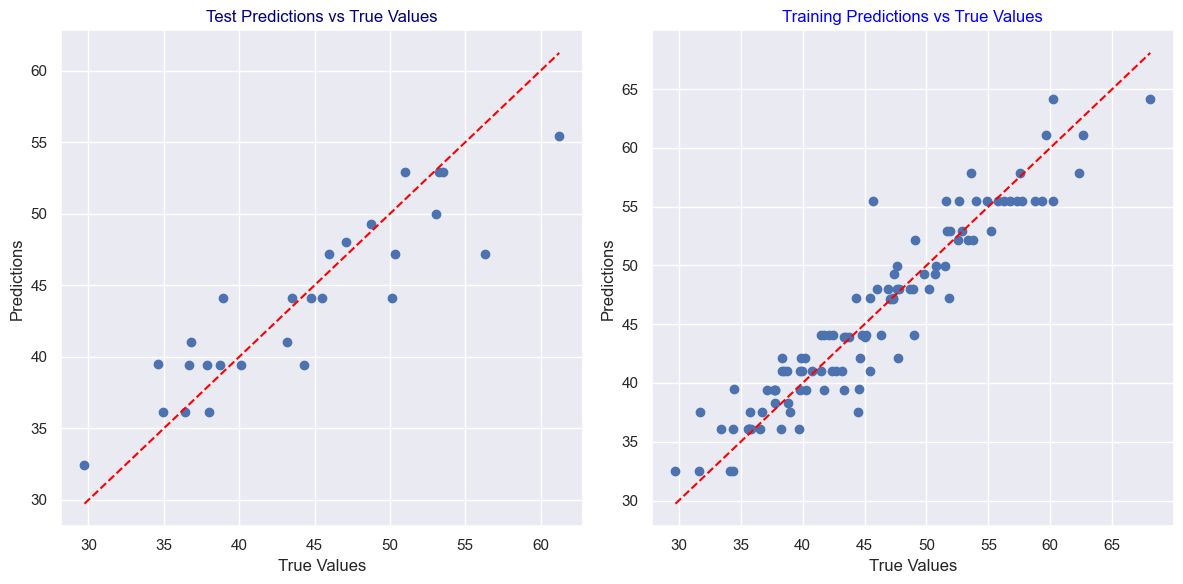

In [842]:
# Plotting training predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title("Training Predictions vs True Values",fontsize=12, color='blue')
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Plotting test predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Test Predictions vs True Values",fontsize=12, color='navy')
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()



In [949]:
# Perform cross-validation (use negative MSE for regression or use R^2)
cv_scores = cross_val_score(best_model, X, y, cv=6, scoring='r2', n_jobs=-1)  # Using R^2 as scoring metric and 6-fold
# Output the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from cross-validation: {np.mean(cv_scores)}")
print(f"Standard Deviation of R² scores: {np.std(cv_scores)}")

Cross-validation R² scores: [  0.394   0.722   0.625   0.348   0.646   0.011]
Mean R² score from cross-validation: 0.45777886552722274
Standard Deviation of R² scores: 0.2411388119740795


* We have obtained an array of accuracy of the model performance for each fold. The standard deviation of 0.24113 suggests that the model's performance fluctuates between different subsets of data. The very low R² score from the sixth fold is poor because it suggests that the model is doing bad in that fold. But for this dataset, the model generally works well in the training dataset with accuracy of 89% and as we increae the size of the trainig dataset, it still performs well. The best folds are the second (score=0.722) and the fifth (score=0.646) as they have the highest score.

* Decision tree might not the be the most suitable model for this type of dataset due to its complexity . Let's try Linear regression.

## Linear Regression

In [846]:
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression model
model2 = LinearRegression()

# Fit the model
model2.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

# Evaluate the model's performance
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)
train_r = r2_score(y_train, y_train_pred2)
test_r = r2_score(y_test, y_test_pred2)

# Print the performance metrics
print(f"Training MSE: {train_mse2}")
print(f"Test MSE: {test_mse2}")
print(f"Training accuracy (R²): {train_r}")
print(f"Test accuracy (R²): {test_r}")

# Plotting both training and test predictions
plt.figure(figsize=(12, 6))

# Training plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred2, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Perfect fit')
plt.xlabel('Actual values (Training)')
plt.ylabel('Predicted values (Training)')
plt.title('Training Data: Actual vs Predicted')
plt.legend()

# Test plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred2, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect fit')
plt.xlabel('Actual values (Test)')
plt.ylabel('Predicted values (Test)')
plt.title('Test Data: Actual vs Predicted')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Training MSE: 13.298548825869831
Test MSE: 15.11233308094268
Training accuracy (R²): 0.7937748922029433
Test accuracy (R²): 0.7372440696191513


In [847]:
# Perform cross-validation (use negative MSE for regression or use R^2)
cv_scores2 = cross_val_score(model2, X, y, cv=6, scoring='r2', n_jobs=-1)  # Using R^2 as scoring metric and 6-fold
# Output the cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score from cross-validation: {np.mean(cv_scores)}")
print(f"Standard Deviation of R² scores: {np.std(cv_scores)}")

Cross-validation R² scores: [  0.394   0.722   0.625   0.348   0.646   0.011]
Mean R² score from cross-validation: 0.45777886552722274
Standard Deviation of R² scores: 0.2411388119740795


* The training accuracy is 79% and the cross-validation accuracy is 24%. The model is good and I can now test and analyse my data.

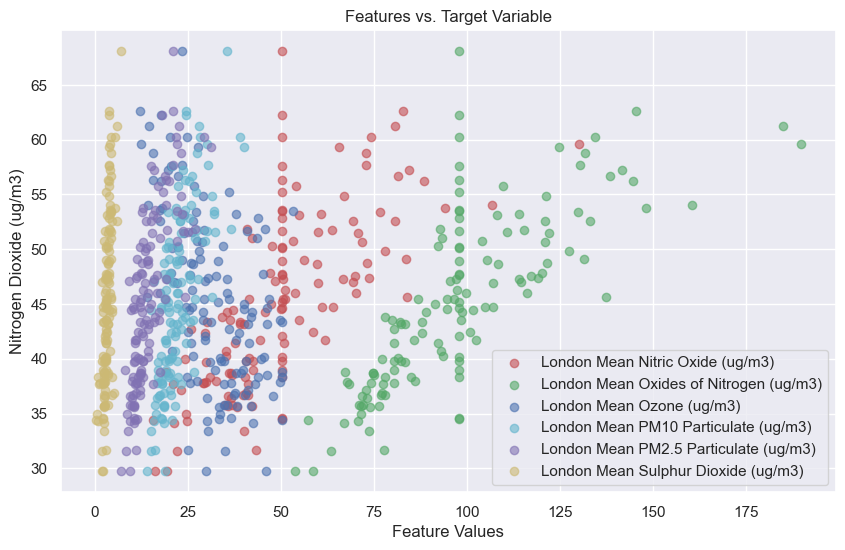

In [849]:
import matplotlib.pyplot as plt

# Define colors for each feature
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Create the plot
plt.figure(figsize=(10, 6))

# Loop through each feature and plot it
for i, feature in enumerate(X.columns):
    plt.scatter(X[feature], y, color=colors[i], label=feature, alpha=0.6)

# Labels & Title
plt.xlabel("Feature Values")
plt.ylabel("Nitrogen Dioxide (ug/m3)")
plt.title("Features vs. Target Variable")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [850]:
# will use PCA to reduce the features from 6 to 5, and then plot the results within a 3D scatterplot.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(Modified_dataset)

print("\nThe five PCA components are made up of these mixtures of the original four variables:")
print(" Components ")
print("=========== ======= ======= ======= =======")
for i, component in enumerate(pca.components_):
    print("{:>10d} {}".format(i, component))


The five PCA components are made up of these mixtures of the original four variables:
 Components 
=========== ======= ======= ======= =======
         0 [  0.584   0.198   0.749  -0.216   0.074   0.080   0.019]
         1 [  0.000   0.293   0.074   0.792   0.409   0.336   0.028]
         2 [ -0.494   0.527   0.030  -0.508   0.324   0.336   0.028]


In [851]:
x_reduced = pca.transform(Modified_dataset)
print('\nReduced data now has shape {}, with first five rows being:'.format(x_reduced.shape))


Reduced data now has shape (132, 3), with first five rows being:


In [852]:
print(x_reduced[:132, :])

[[  0.404   1.721   1.041]
 [  7.982   7.636  23.076]
 [ -2.781   9.020  -7.181]
 [ -0.665  13.761  -0.300]
 [ -1.634  25.931  -0.767]
 [ -4.072   8.558 -10.130]
 [ -3.264   3.977  -8.529]
 [ -3.060  -4.752  -8.922]
 [  2.248  -2.419   6.195]
 [  2.706  -7.952   5.965]
 [  3.127  -9.000   7.120]
 [  6.292  -7.284  16.499]
 [  6.613  -0.045  18.420]
 [  6.932  -4.213  18.206]
 [  1.740   9.611   6.032]
 [  0.670  15.251   4.539]
 [ -5.440  11.928 -13.401]
 [ -3.228  11.136  -7.612]
 [ -3.767  -2.653 -10.730]
 [ -1.736  -3.687  -5.235]
 [ -0.299  -3.494  -1.186]
 [  5.069  -7.465  12.988]
 [ -0.663  -0.916  -2.278]
 [  4.866  -5.818  12.074]
 [ 45.895  -1.314   9.973]
 [ 14.589   0.761   7.579]
 [ -5.235   3.255   2.738]
 [ -8.701  13.610   3.437]
 [-20.601   5.519  -0.668]
 [-26.349   7.488   2.615]
 [-32.281  -4.629  -2.626]
 [-28.538  -9.778  -1.128]
 [  1.169  -6.247   1.618]
 [ 11.785  -4.999   3.598]
 [ 63.435  -1.303  -1.667]
 [ 63.226  -3.972   7.316]
 [ 13.831  -3.027   6.476]
 

In [853]:
print("We can approximately reconstruct the original values from the PCA components:")
X_reconstructed = np.dot(x_reduced, pca.components_) + pca.mean_
print(X_reconstructed[:132, :])

We can approximately reconstruct the original values from the PCA components:
[[ 49.953  46.445  98.397  32.781  23.268  15.464   3.398]
 [ 43.489  61.302 105.178  24.625  33.382  25.454   4.324]
 [ 52.160  43.617  96.301  43.431  23.357  14.904   3.315]
 [ 49.996  49.056  98.444  43.230  27.680  18.977   3.682]
 [ 49.666  52.186  98.602  53.318  32.436  22.834   3.996]
 [ 52.863  41.671  95.210  44.844  22.118  13.656   3.196]
 [ 52.542  41.332  95.526  40.226  20.822  12.718   3.126]
 [ 52.853  38.606  95.024  33.468  17.139   9.668   2.871]
 [ 48.481  48.314  99.630  26.482  23.379  15.949   3.459]
 [ 48.860  46.662  99.558  22.117  21.076  14.049   3.305]
 [ 48.535  47.047  99.832  20.609  21.052  14.117   3.315]
 [ 45.747  53.124 102.613  16.515  25.024  18.095   3.685]
 [ 44.988  56.323 103.446  21.203  28.631  21.199   3.950]
 [ 45.279  55.051 103.371  17.942  26.881  19.752   3.832]
 [ 48.269  51.655 100.131  36.204  28.210  19.899   3.786]
 [ 48.385  52.309  99.701  41.662  29

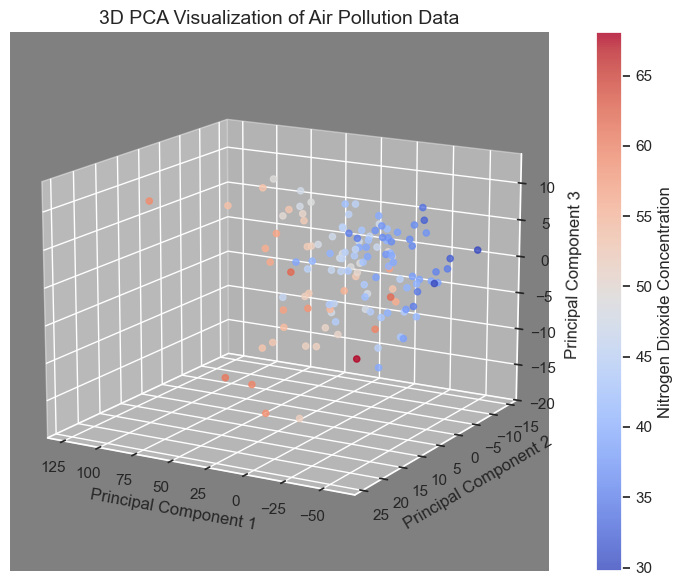

In [854]:
from mpl_toolkits.mplot3d import Axes3D # We can use a 3D scatterplot to visualise the new features
# Apply PCA to reduce the dataset to 3D
pca = PCA(n_components=3)
x_reduced = pca.fit_transform(X)  # Use feature matrix (X) instead of Modified_dataset.data

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(projection='3d')

# Scatter plot with target variable (y) as color
sc = ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y, cmap='coolwarm', alpha=0.8)

# Set labels and title
ax.set_title('3D PCA Visualization of Air Pollution Data', size=14)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Nitrogen Dioxide Concentration')

# Improve visualization
ax.set_facecolor('gray')
ax.view_init(elev=15, azim=120)  # Adjust the angle

# Show the plot
plt.show()


In [855]:
from sklearn import linear_model

# Select dependent variable (y) and independent variables (X)
y = Modified_dataset["London Mean Nitrogen Dioxide (ug/m3)"]
X = Modified_dataset[["London Mean Nitric Oxide (ug/m3)", 
                      "London Mean Oxides of Nitrogen (ug/m3)", 
                      "London Mean Ozone (ug/m3)",
                      "London Mean PM10 Particulate (ug/m3)",
                      "London Mean PM2.5 Particulate (ug/m3)",
                      "London Mean Sulphur Dioxide (ug/m3)"]]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = linear_model.LinearRegression()
linreg.fit(X_train,y_train) # train the model with x such that it maximises y

# extract the features as arrays
x0_test = X_test.iloc[:, 0].values.reshape(-1, 1)  # First feature of X_test
x1_test = X_test.iloc[:, 1].values.reshape(-1, 1)  # Second feature of X_test
x2_test = X_test.iloc[:, 2].values.reshape(-1, 1)  # Third feature of X_test
x3_test = X_test.iloc[:, 3].values.reshape(-1, 1)  # First feature of X_test
x4_test = X_test.iloc[:, 4].values.reshape(-1, 1)  # Second feature of X_test
x5_test = X_test.iloc[:, 5].values.reshape(-1, 1)  # Third feature of X_test


x0_train = X_train.iloc[:, 0].values.reshape(-1, 1)  # First feature of X_train
x1_train = X_train.iloc[:, 1].values.reshape(-1, 1)  # Second feature of X_train
x2_train = X_train.iloc[:, 2].values.reshape(-1, 1)  # Second feature of X_train
x3_train = X_train.iloc[:, 3].values.reshape(-1, 1)  # First feature of X_train
x4_train = X_train.iloc[:, 4].values.reshape(-1, 1)  # Second feature of X_train
x5_train = X_train.iloc[:, 5].values.reshape(-1, 1)  # Second feature of X_train

In [856]:
linreg = linear_model.LinearRegression()
linreg.fit(x0_train, y_train)  # Train the model 
y_pred = linreg.predict(x0_test) 

In [857]:
linreg = linear_model.LinearRegression()
linreg.fit(x1_train, y_train)  # Train the model 
y_pred = linreg.predict(x1_test) 

In [858]:
linreg = linear_model.LinearRegression()
linreg.fit(x2_train, y_train)  # Train the model 
y_pred = linreg.predict(x2_test) 

In [859]:
linreg = linear_model.LinearRegression()
linreg.fit(x3_train, y_train)  # Train the model 
y_pred = linreg.predict(x3_test) 

In [860]:
linreg = linear_model.LinearRegression()
linreg.fit(x4_train, y_train)  # Train the model 
y_pred = linreg.predict(x4_test) 

In [861]:
linreg = linear_model.LinearRegression()
linreg.fit(x5_train, y_train)  # Train the model 
y_pred = linreg.predict(x5_test) 

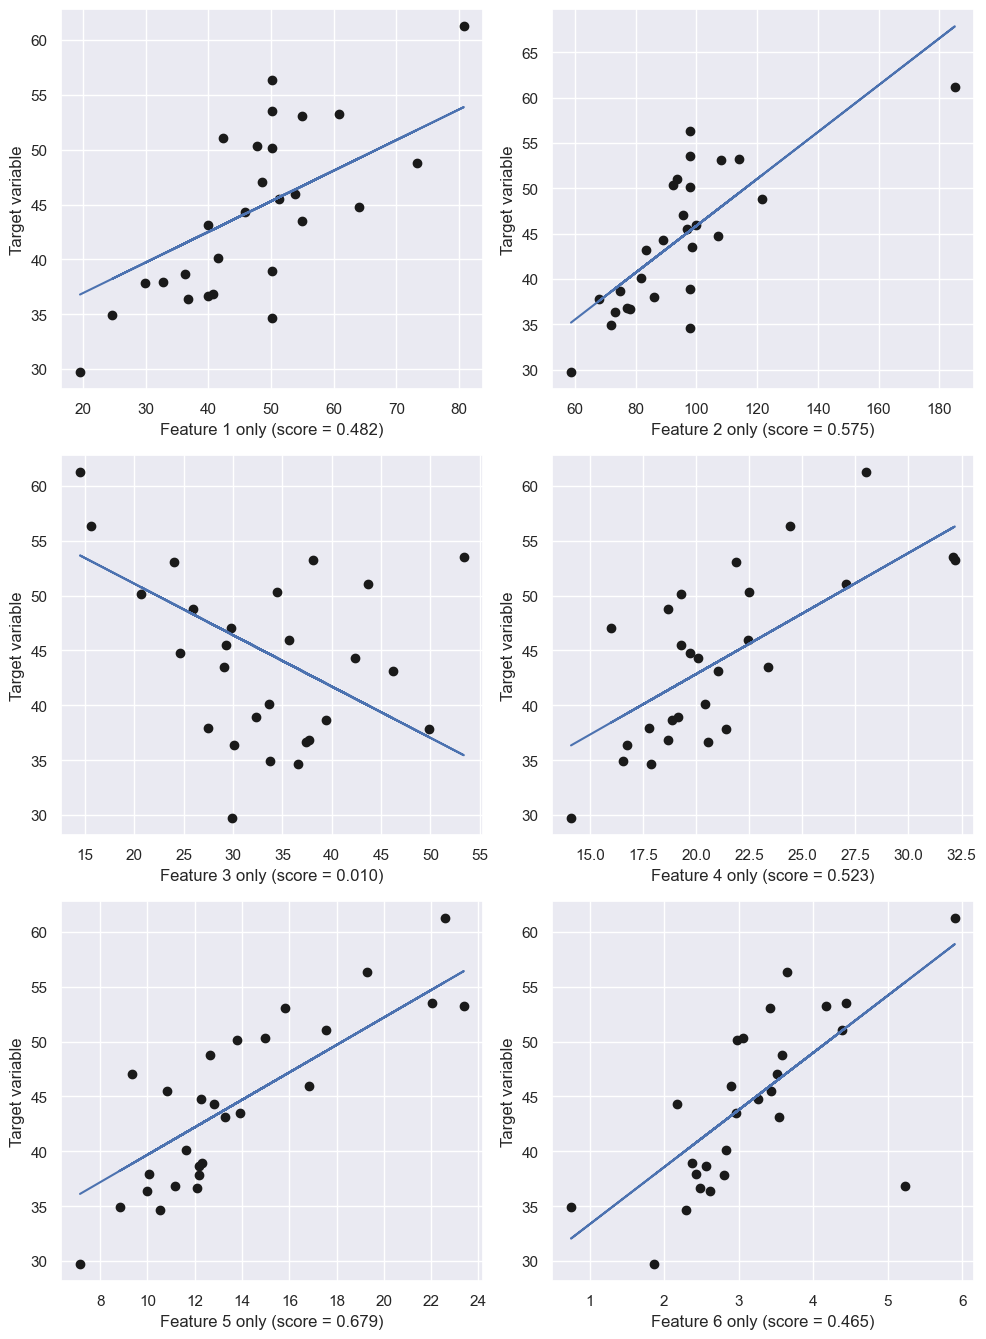

In [862]:

# Initialize the linear regression model
linreg = linear_model.LinearRegression()

# Set the figure size
plt.figure(figsize=(10, 22))

# Loop through each feature in X_train (and X_test)
for f in range(X.shape[1]):  # X.shape[1] gives the number of features
    xi_test = X_test.iloc[:, f].values.reshape(-1, 1)  # Extract the feature and reshape
    xi_train = X_train.iloc[:, f].values.reshape(-1, 1)  # Extract the feature and reshape

    # Train the model
    linreg.fit(xi_train, y_train)

    # Predict target values using the test data for the feature
    y_pred = linreg.predict(xi_test)

    # Compute the score (R² value)
    score = linreg.score(xi_test, y_test)

    # Create the subplot for each feature
    plt.subplot(5, 2, f + 1)  # Adjust the layout based on the number of features (6 in this case)
    
    # Scatter plot of the test data points
    plt.scatter(xi_test, y_test, color='k')
    
    # Regression line
    plt.plot(xi_test, y_pred, color='b', linewidth=1.5)
    
    # Label the x-axis and show the score in the title
    plt.xlabel(f'Feature {f+1} only (score = {score:.3f})')
    plt.ylabel('Target variable')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


* From the graphs, Feature 2 ("London Mean Oxides of Nitrogen (ug/m3)") and Feauture 5 ( "London Mean PM2.5 Particulate (ug/m3)") have the highest scores, 0.575 & 0.679 respectively; this suggest that they give higher prediction for nitrogen dioxide concentration. 

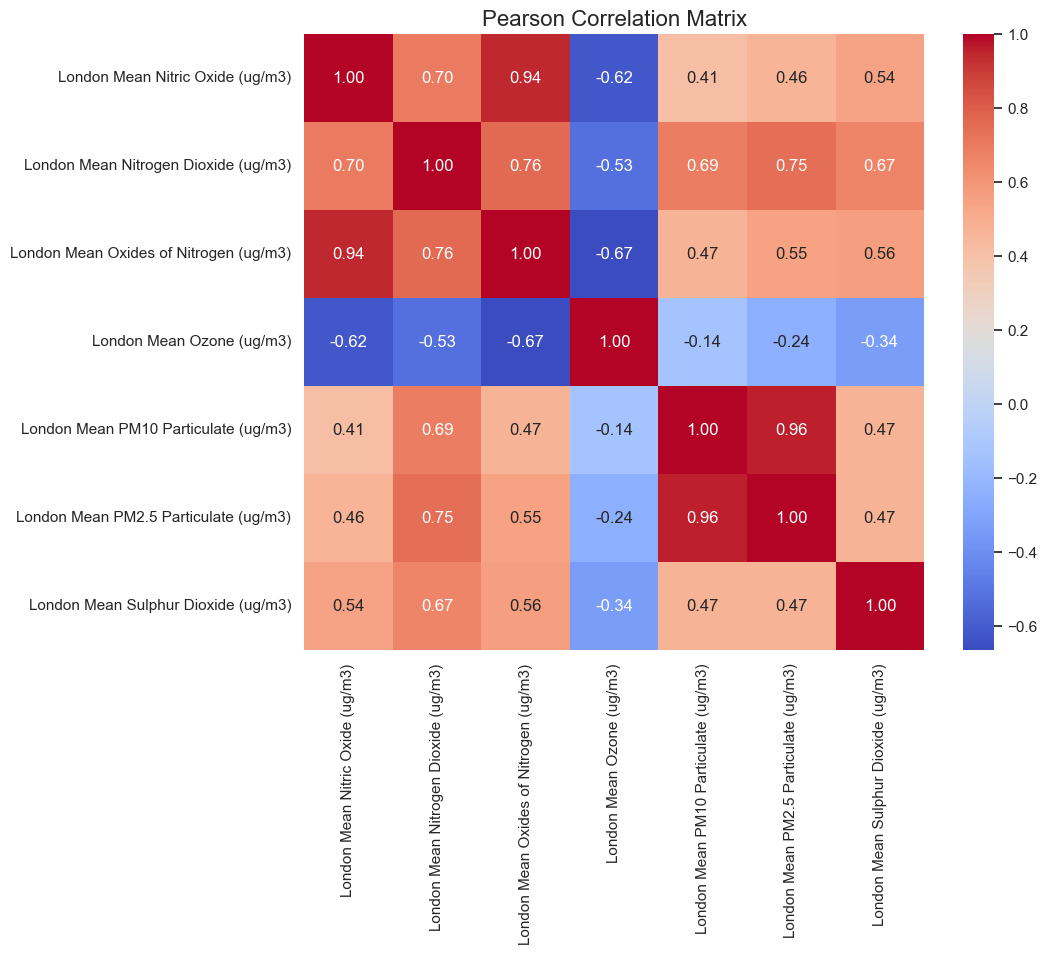

In [864]:
import seaborn as sns

# Compute the Pearson correlation matrix
correlation_matrix = Modified_dataset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Pearson Correlation Matrix', size=16)
plt.show()


* Finally, with the computation of the Pearson correlation matrix we can confirm that the relationship between London Mean Nitrogen Dioxide (ug/m3) and the remaining air pollutant is as follows: "London Mean Oxides of Nitrogen (ug/m3)" and  "London Mean PM2.5 Particulate (ug/m3)" have a higher correlation (0.76 and 0.75 respectively) as opposed to the remaining four pollutant.

# Conclusion
* After preprocessing the dataset , computing the decision tree methodology and linear regression, the air pollutant London Mean Nitrogen Dioxide (ug/m3) has some correlation of approximately 50-70% in relation to  the London Mean Oxides of Nitrogen (ug/m3) and London Mean PM2.5 Particulate (ug/m3). Due to this relationship , it is possible to predict Nitrogen Dioxide levels.